# NBA games data analysis

In [63]:
import os
import sys
import requests
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets
import numpy as np
import pandas as pd
from ipywidgets import interact, interact_manual
import seaborn as sns

In [64]:
nba_ranking = pd.read_csv('ranking.csv')
nba_ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN


In [65]:
nba_ranking.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')

In [66]:
nba_ranking.describe()

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
count,2.017920e+05,201792.0,201792.000000,201792.000000,201792.000000,201792.000000,201792.000000,3990.000000
mean,1.610613e+09,0.0,21401.535210,56.475455,28.241278,28.234177,0.492745,0.600000
std,8.640908e+00,0.0,2393.667432,28.505551,17.214043,17.205158,0.187940,0.489959
min,1.610613e+09,0.0,12003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,0.0,22006.000000,33.000000,14.000000,14.000000,0.371000,0.000000
50%,1.610613e+09,0.0,22011.000000,66.000000,28.000000,28.000000,0.500000,1.000000
75%,1.610613e+09,0.0,22016.000000,82.000000,42.000000,41.000000,0.621000,1.000000
max,1.610613e+09,0.0,22021.000000,82.000000,73.000000,72.000000,1.000000,1.000000


In [67]:
nba_ranking['Year'] = pd.DatetimeIndex(nba_ranking['STANDINGSDATE']).year
nba_ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,Year
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN,2022
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN,2022
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN,2022
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN,2022
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN,2022


In [68]:
nba_ranking['SEASON_ID'].nunique()

39

In [69]:
teams_win = nba_ranking[['TEAM','W']]
teams_win.head()

,TEAM,W
0,Phoenix,53
1,Golden State,46
2,Memphis,46
3,Utah,42
4,Dallas,41


# Total Wins by Teams

In [70]:
nba_games  = pd.read_csv('games.csv')
nba_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


## Interactive Visualization

In [71]:
temp = nba_ranking.loc[nba_ranking['SEASON_ID'] == 22021]

In [72]:
temp = temp.groupby(['TEAM']).sum().reset_index()

In [84]:
@ipywidgets.interact(style = plt.style.available)
def scatter_plot(x=['W','L','G'], y = ['TEAM']):    
    fig, ax = plt.subplots(figsize=(75, 20))
    plt.bar(temp[y],temp[x])

interactive(children=(Dropdown(description='x', options=('W', 'L', 'G'), value='W'), Dropdown(description='y',…

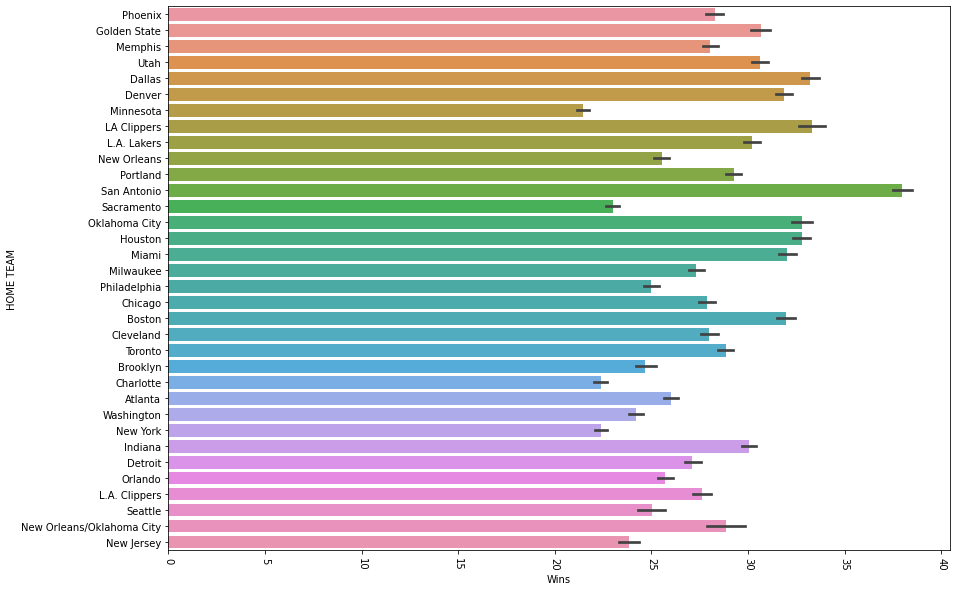

In [85]:
plt.figure(figsize=(14,10))
sns.barplot(x="W",y="TEAM",data = nba_ranking)
plt.xlabel("Wins")
plt.xticks(rotation = 270)
plt.ylabel("HOME TEAM")
plt.show()

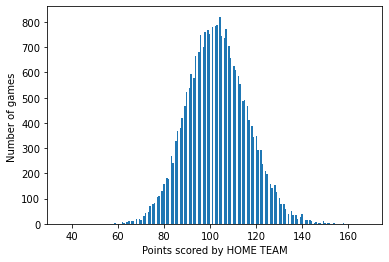

mean: 103.10604350702417 std: 13.174469372391712


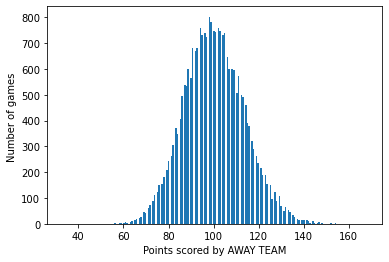

mean: 100.29411993617931 std: 13.342756423883841


In [86]:
plt.hist(nba_games["PTS_home"], bins = 200)
plt.xlabel("Points scored by HOME TEAM")
plt.ylabel("Number of games ")
plt.show()
std_pth = np.std(nba_games["PTS_home"])
mean_pth = np.mean(nba_games["PTS_home"])

print ("mean:",mean_pth,"std:",std_pth)


plt.hist(nba_games["PTS_away"], bins = 200)
plt.xlabel("Points scored by AWAY TEAM")
plt.ylabel("Number of games ")
plt.show()
std_pta = np.std(nba_games["PTS_away"])
mean_pta = np.mean(nba_games["PTS_away"])

print ("mean:",mean_pta,"std:",std_pta)

## Q. At least 3 paragraphs of connective information to help a novice understand what is happening in your datasets.

This dataset was compiled in order to work on NBA game data. I found this dataset on Kaggle which was taken from the NBA stats website. It can be easily found on Kaggle as it is a open source data set available for all. https://www.kaggle.com/datasets/nathanlauga/nba-games?resource=download&select=games.csv. 
There is no such license for the dataset as it is open source and freely available for all. So we can perform all kinds of function on the dataset as we see fit for our use. There are 25796 rows and 21 columns in the dataset. The games dataset that has been used in this EDA is 3.99MB
There are five datasets available:

1. games.csv: all games from the 2004 season to the most recent update, including the date, teams, and some details such as the number of points scored, etc.
2. games_details.csv: game dataset details, including all player statistics for a given game.
3. payer.csv: player information (name)
4. ranking.csv: a day's worth of NBA rankings (split into west and east on CONFERENCE column teams).
5. teams.csv: all NBA teams

This dataset was compiled in order to work on NBA game data. This dataset was created using the NBA Stats website.
There are five datasets available:
games.csv: all games from the 2004 season to the most recent update, including the date, teams, and some details such as the number of points scored, etc.
games details.csv: game dataset details, including all player statistics for a given game.
csv: player information (name)
ranking.csv: a day's worth of NBA rankings (split into west and east on CONFERENCE column teams).
csv: all NBA teams

Information for the visulization
1. The interactive plot showsus relationship between wins, losses and total for games various teams(For latest Season ID 22021)
2. The second interactive scatter plot shows us the relationship between Home team, Away team and the points scored by them in various types such as Points scores by the home team and away team, assist done by the home team and the away team and rebound made the home team and the away team.

1. The first contextual visualization is points scored by various home teams
2. The second Visualization is a univariate analysis showing the mean and standard deviation of number of points score by Home team and the Away team in the total number of games played by them.
3. The third contextual visualization represents the average wins of the top ten teams.

## Citations of all the data sources used and information for the reader to be able to find those datasets themselves.


1. https://www.kaggle.com/datasets/nathanlauga/nba-games?resource=download&select=games.csv
2. https://www.kaggle.com/datasets/nathanlauga/nba-games/discussion?resource=download&select=games.csv

# Group submission guidelines:


## An additional interactive plot with your dataset


In [76]:
nba_games = pd.read_csv('games.csv')
nba_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [77]:
nba_games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [78]:
# List of column values for x and y axes are
x_list = ['TEAM_ID_home','TEAM_ID_away']
y_list = ['PTS_home','AST_home','REB_home','PTS_away','AST_away','REB_away']

In [87]:
@ipywidgets.interact(style = plt.style.available, x = x_list, y = y_list, colormap = plt.colormaps())
def scatter_plot(style, x, y, colormap):
    with plt.style.context(style):
        plt.figure(figsize=(14,10))
        plt.scatter(nba_games[x], 
                    nba_games[y],
                    cmap = colormap,
                    s = 20)
        plt.xlabel(x)
        plt.ylabel(y)

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

## A third contextual visualization

In [88]:
teams_win = nba_ranking[['TEAM','W']]
teams_win.head()

,TEAM,W
0,Phoenix,53
1,Golden State,46
2,Memphis,46
3,Utah,42
4,Dallas,41


In [89]:
nba_ranking1 = pd.DataFrame(teams_win)

nba_ranking2 = nba_ranking1.groupby(['TEAM']).mean()
nba_ranking2 = nba_ranking2.reset_index()
nba_ranking2 = nba_ranking2.sort_values(by=['W'], ascending = False)
nba_ranking2 = nba_ranking2.set_index('TEAM')
nba_ranking2.index

Index(['San Antonio', 'LA Clippers', 'Dallas', 'Houston', 'Oklahoma City',
       'Miami', 'Boston', 'Denver', 'Golden State', 'Utah', 'L.A. Lakers',
       'Indiana', 'Portland', 'New Orleans/Oklahoma City', 'Toronto',
       'Phoenix', 'Memphis', 'Cleveland', 'Chicago', 'L.A. Clippers',
       'Milwaukee', 'Detroit', 'Atlanta', 'Orlando', 'New Orleans', 'Seattle',
       'Philadelphia', 'Brooklyn', 'Washington', 'New Jersey', 'Sacramento',
       'New York', 'Charlotte', 'Minnesota'],
      dtype='object', name='TEAM')

In [90]:
top_five = nba_ranking2.head(10)

<BarContainer object of 10 artists>

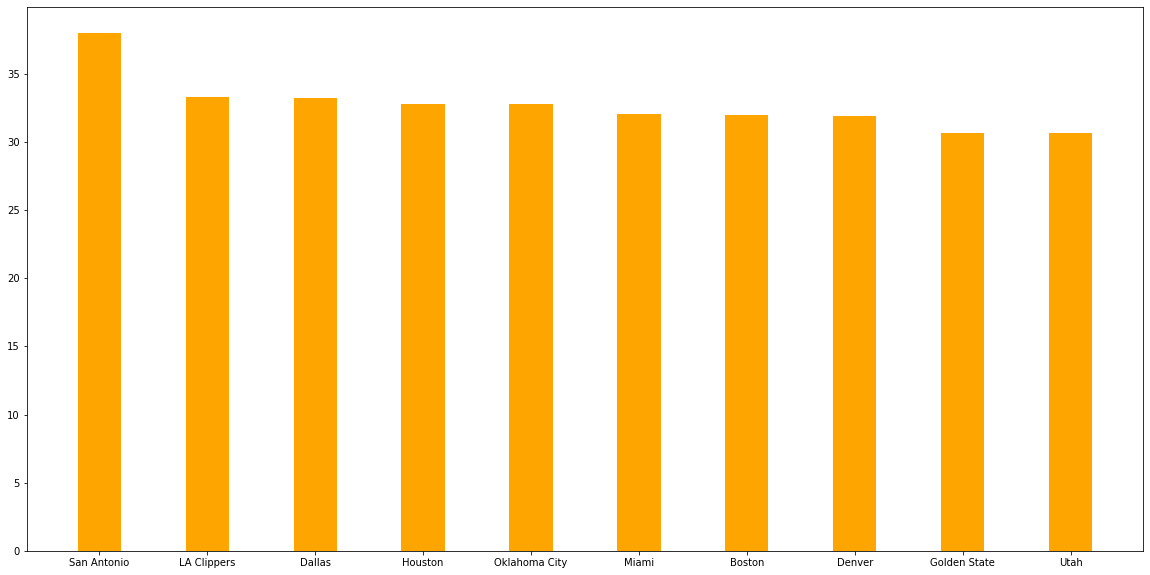

In [91]:
plt.figure(figsize=(20,10))
# plt.plot(ufo3.index, ufo3['W'],kind=bar)
plt.bar(top_five.index, top_five['W'], color ='orange',width = 0.4)

## A paragraph describing what you learned on your own from this assignment and what you learned from your group members (different for each group member) 

1. Through this assignment, I was able to enhance my skills in usage of various visualization libraries, applied them to plot interactive plots, perform data manipulation, Identifying, analyzing, and interpreting trends or patterns in large amounts of data, Using statistical tools to identify, analyze, and interpret patterns and trends in large data sets that could aid in diagnosis and prediction.
2. Through my group members, I was able to enhance my programming skills. Through my team member I was able to understand ipywidgets, it's syntax and it's application. Also through my team member, I understood, seaborn library, it's syntax and it's application

## 1-2 paragraphs describing what things went according to your group work plan submitted in Part 2 and what things you'd like to do differently next time -- include in your text input


The interactivity went according to our plan and we able to infer significant insights from data. Some of the steps which went according to our plan.
1. We were able to plot visualization for top teams by their avaerage wins
2. We were able interactively plot wins by various team during a specific season id
3. We were also able to interactivly show how home team and away team scored their points, assists and rebound.

We were not able to compare the visualizations from 2nd part and draw conclusions from data collected across multiple seasons. A failure that we encountered was that we were not able to merge 3 interactive dashboards together properly in the 2nd part. As it was throwing some kind of error which we were not able to decode due time limit. Also, instead of compiling our work on starboard we plan to upload the mybinder link.